### Background mortality only

In [1]:
import numpy as np
import xarray as xr
import csv
import pandas as pd

import functions_py.fates_xarray_functions as fa

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import Normalize


In [2]:
# atkin - first ten years
fates_atkin ='/compyfs/need138/elm_runs/atkin_tveg_fix.Ec63cce2-F0a617d8.2023-01-19/run/lnd/hist/atkin_tveg_fix.Ec63cce2-F0a617d8.2023-01-19.elm.h0.sofar2000s.nc'
fates_atkin = xr.open_dataset(fates_atkin, decode_times=False)

# atkin bmort only - first ten years
fates_atkin_v2 = '/compyfs/need138/elm_runs/fixedbiogeog_nocomp_Atkin_bmort.Ec63cce2-F3bbfd35.2023-02-01/run/lnd/hist/fixedbiogeog_nocomp_Atkin_bmort.Ec63cce2-F3bbfd35.2023-02-01.elm.h0.2000s.nc'
fates_atkin_v2 = xr.open_dataset(fates_atkin_v2, decode_times=False)

n_lat = len(fates_atkin.variables['lat'])
n_lon = len(fates_atkin.variables['lon'])

nyears = int(len(fates_atkin.variables['time'])/12)

# for getting dynamics of the last year
tave_start = (nyears-1)*12
tave_stop = nyears*12


cohort_size_bins = fates_atkin.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)


Text(0.5, 1.0, 'Atkin - bmort only - year 10')

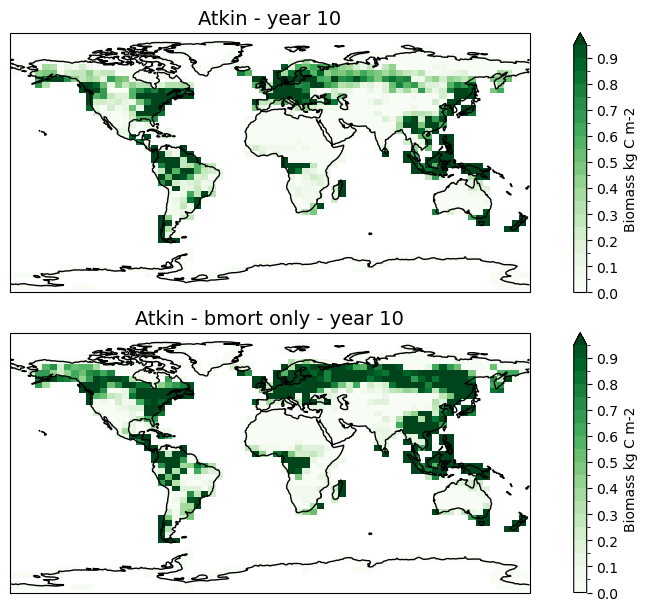

In [3]:
vegc_atkin = fates_atkin.FATES_VEGC.isel(time=slice(tave_start,tave_stop)).mean(dim='time')
vegc_atkin_v2 = fates_atkin_v2.FATES_VEGC.isel(time=slice(tave_start,tave_stop)).mean(dim='time')


fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,6), constrained_layout=True)

axs = axs.flatten()

clevs = np.arange(0.,1.,0.05)

vegc_atkin.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Biomass kg C m-2"}, ax=axs[0])
axs[0].coastlines()
axs[0].set_title('Atkin - year 10', fontsize=14)

vegc_atkin_v2.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "Biomass kg C m-2"}, ax=axs[1])
axs[1].coastlines()
axs[1].set_title('Atkin - bmort only - year 10', fontsize=14)


### Plot  each source of mortality - sanity check - average over last year

Text(0.5, 1.0, 'Background')

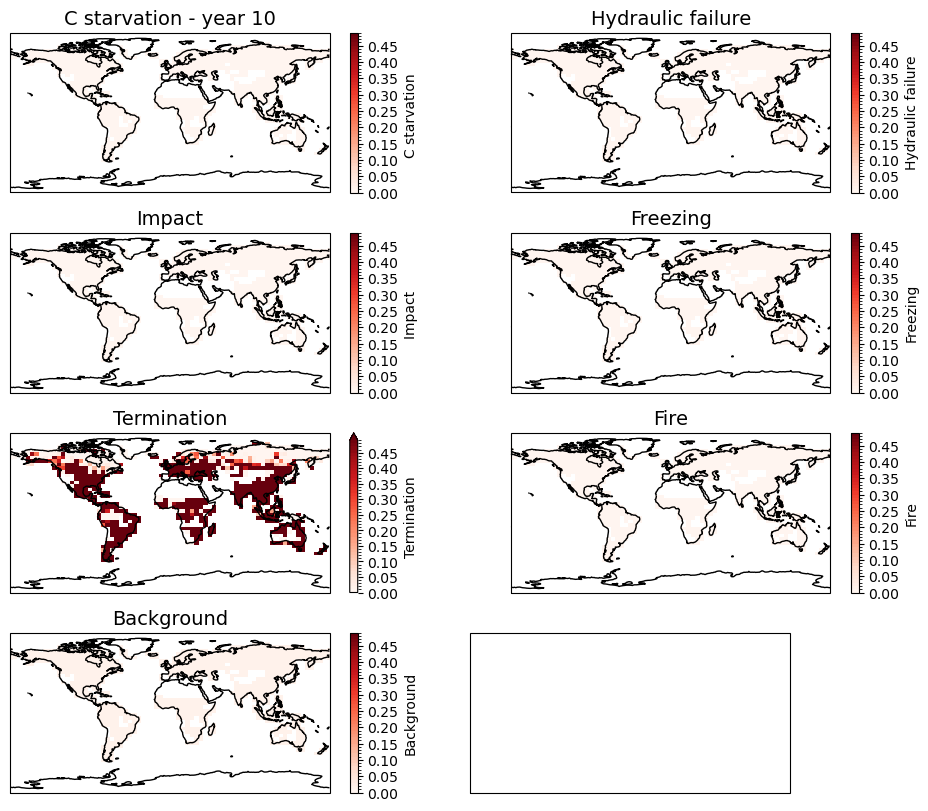

In [4]:
nplant = fates_atkin_v2.FATES_NPLANT_SZPF.sum(dim='fates_levscpf') 

cmort = fates_atkin_v2.FATES_MORTALITY_CSTARV_SZPF.sum(dim='fates_levscpf') 
cmort = cmort/nplant
cmort = cmort.isel(time=slice(tave_start,tave_stop)).mean(dim='time')

hmort = fates_atkin_v2.FATES_MORTALITY_HYDRAULIC_SZPF.sum(dim='fates_levscpf') 
hmort = hmort/nplant
hmort = hmort.isel(time=slice(tave_start, tave_stop)).mean(dim='time')                  

bmort = fates_atkin_v2.FATES_MORTALITY_BACKGROUND_SZPF.sum(dim='fates_levscpf') 
bmort = bmort/nplant
bmort = bmort.isel(time=slice(tave_start,tave_stop)).mean(dim='time')

tmort = fates_atkin_v2.FATES_MORTALITY_TERMINATION_SZPF.sum(dim='fates_levscpf') 
tmort = tmort/nplant
tmort = tmort.isel(time=slice(tave_start,tave_stop)).mean(dim='time')

imort = fates_atkin_v2.FATES_MORTALITY_IMPACT_SZPF.sum(dim='fates_levscpf') 
imort = imort/nplant
imort = imort.isel(time=slice(tave_start,tave_stop)).mean(dim='time')

fmort = fates_atkin_v2.FATES_MORTALITY_FREEZING_SZPF.sum(dim='fates_levscpf') 
fmort = fmort/nplant
fmort = fmort.isel(time=slice(tave_start,tave_stop)).mean(dim='time')

firemort = fates_atkin_v2.FATES_MORTALITY_FIRE_SZPF.sum(dim='fates_levscpf') 
firemort = firemort/nplant
firemort = firemort.isel(time=slice(tave_start,tave_stop)).mean(dim='time')

fig, axs = plt.subplots(nrows=4,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,8), constrained_layout=True)
axs = axs.flatten()

clevs = np.arange(0.,0.5,0.01)

cmort.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Reds',
         cbar_kwargs={"label": "C starvation "}, ax=axs[0])
axs[0].coastlines()
axs[0].set_title('C starvation - year 10', fontsize=14)

hmort.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Reds',
         cbar_kwargs={"label": "Hydraulic failure"}, ax=axs[1])
axs[1].coastlines()
axs[1].set_title('Hydraulic failure', fontsize=14)

imort.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Reds',
         cbar_kwargs={"label": "Impact "}, ax=axs[2])
axs[2].coastlines()
axs[2].set_title('Impact', fontsize=14)

fmort.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Reds',
         cbar_kwargs={"label": "Freezing"}, ax=axs[3])
axs[3].coastlines()
axs[3].set_title('Freezing', fontsize=14)

tmort.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Reds',
         cbar_kwargs={"label": "Termination"}, ax=axs[4])
axs[4].coastlines()
axs[4].set_title('Termination', fontsize=14)

firemort.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Reds',
         cbar_kwargs={"label": "Fire"}, ax=axs[5])
axs[5].coastlines()
axs[5].set_title('Fire', fontsize=14)

bmort.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Reds',
         cbar_kwargs={"label": "Background"}, ax=axs[6])
axs[6].coastlines()
axs[6].set_title('Background', fontsize=14)





In [5]:
pfts = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']


### Termination mortality by pft - average over last year

''

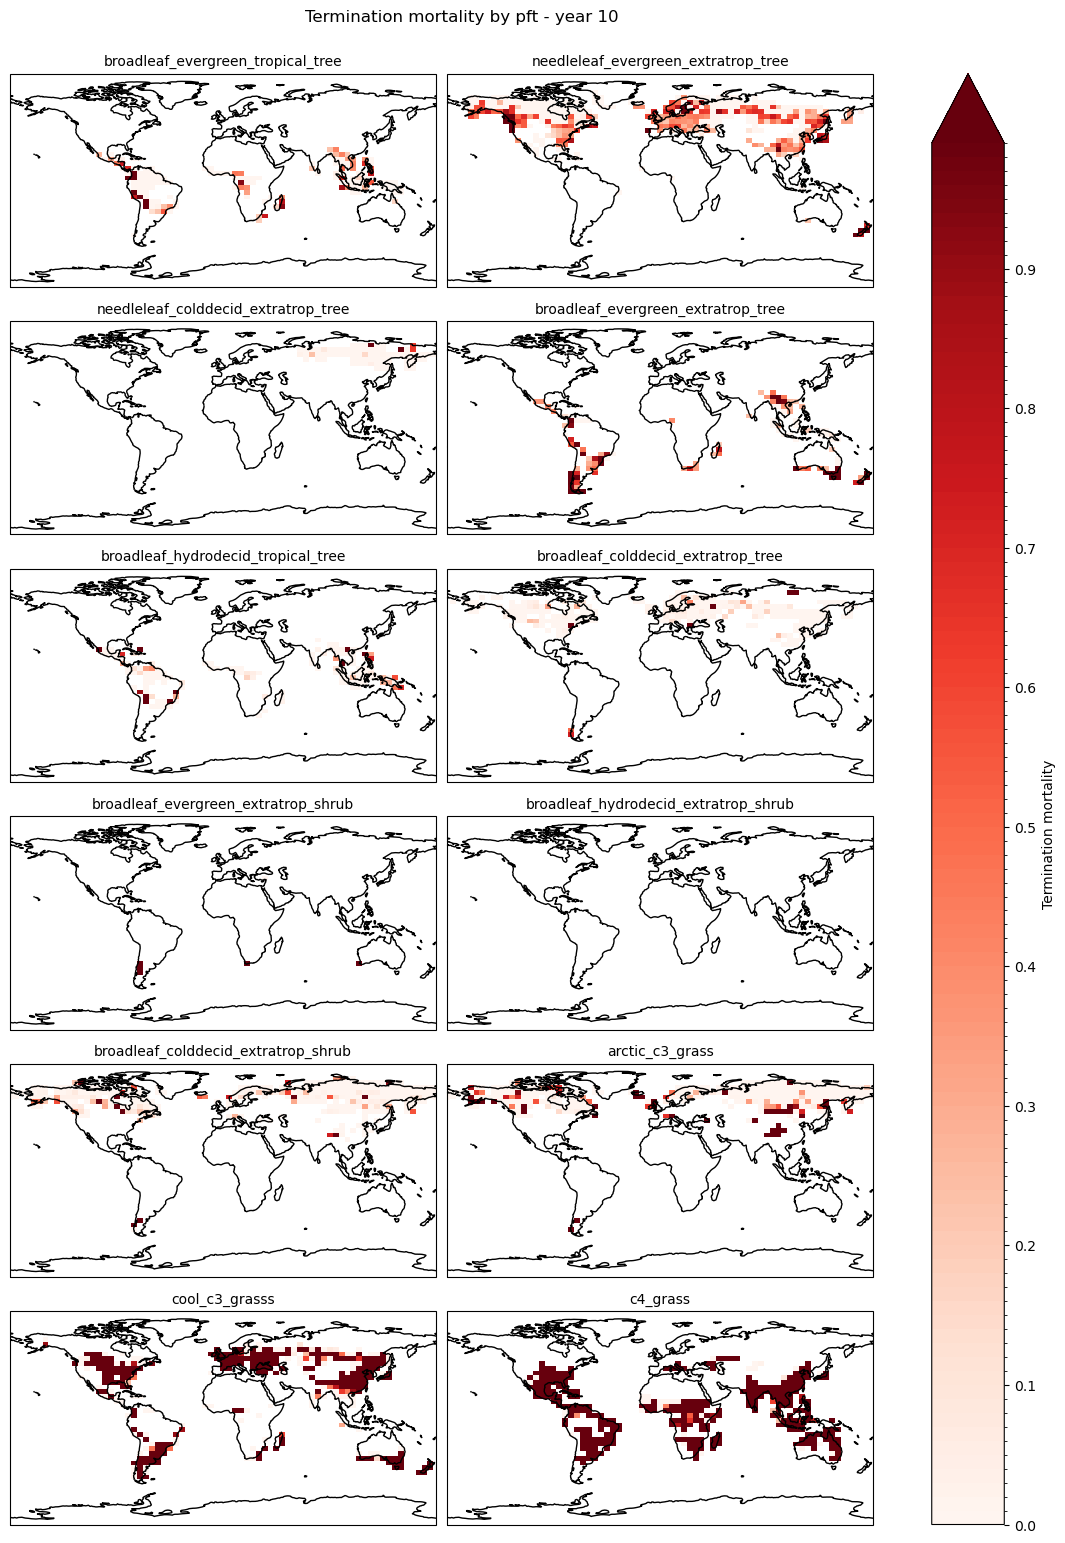

In [6]:
nplnt_sz_by_pft = fa.scpf_to_scls_by_pft(fates_atkin_v2.FATES_NPLANT_SZPF, fates_atkin_v2)
nplnt_by_pft = nplnt_sz_by_pft.sum(dim='fates_levscls')

tmort_sz_by_pft = fa.scpf_to_scls_by_pft(fates_atkin_v2.FATES_MORTALITY_TERMINATION_SZPF, fates_atkin_v2)
tmort_by_pft = tmort_sz_by_pft.sum(dim='fates_levscls') 

tmort = tmort_by_pft/nplnt_by_pft
tmort = tmort.isel(time=slice(tave_start,tave_stop)).mean(dim='time')

g = tmort.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "Termination mortality"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,1.0,0.01), cmap='Reds',
            facecolor="white")

for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=10)

[ax.coastlines() for ax in g.axes.flatten()]

# Add a big title at the top
plt.suptitle('Termination mortality by pft - year 10', y=1.02, x = 0.45)
;

### Termination mortality first year

''

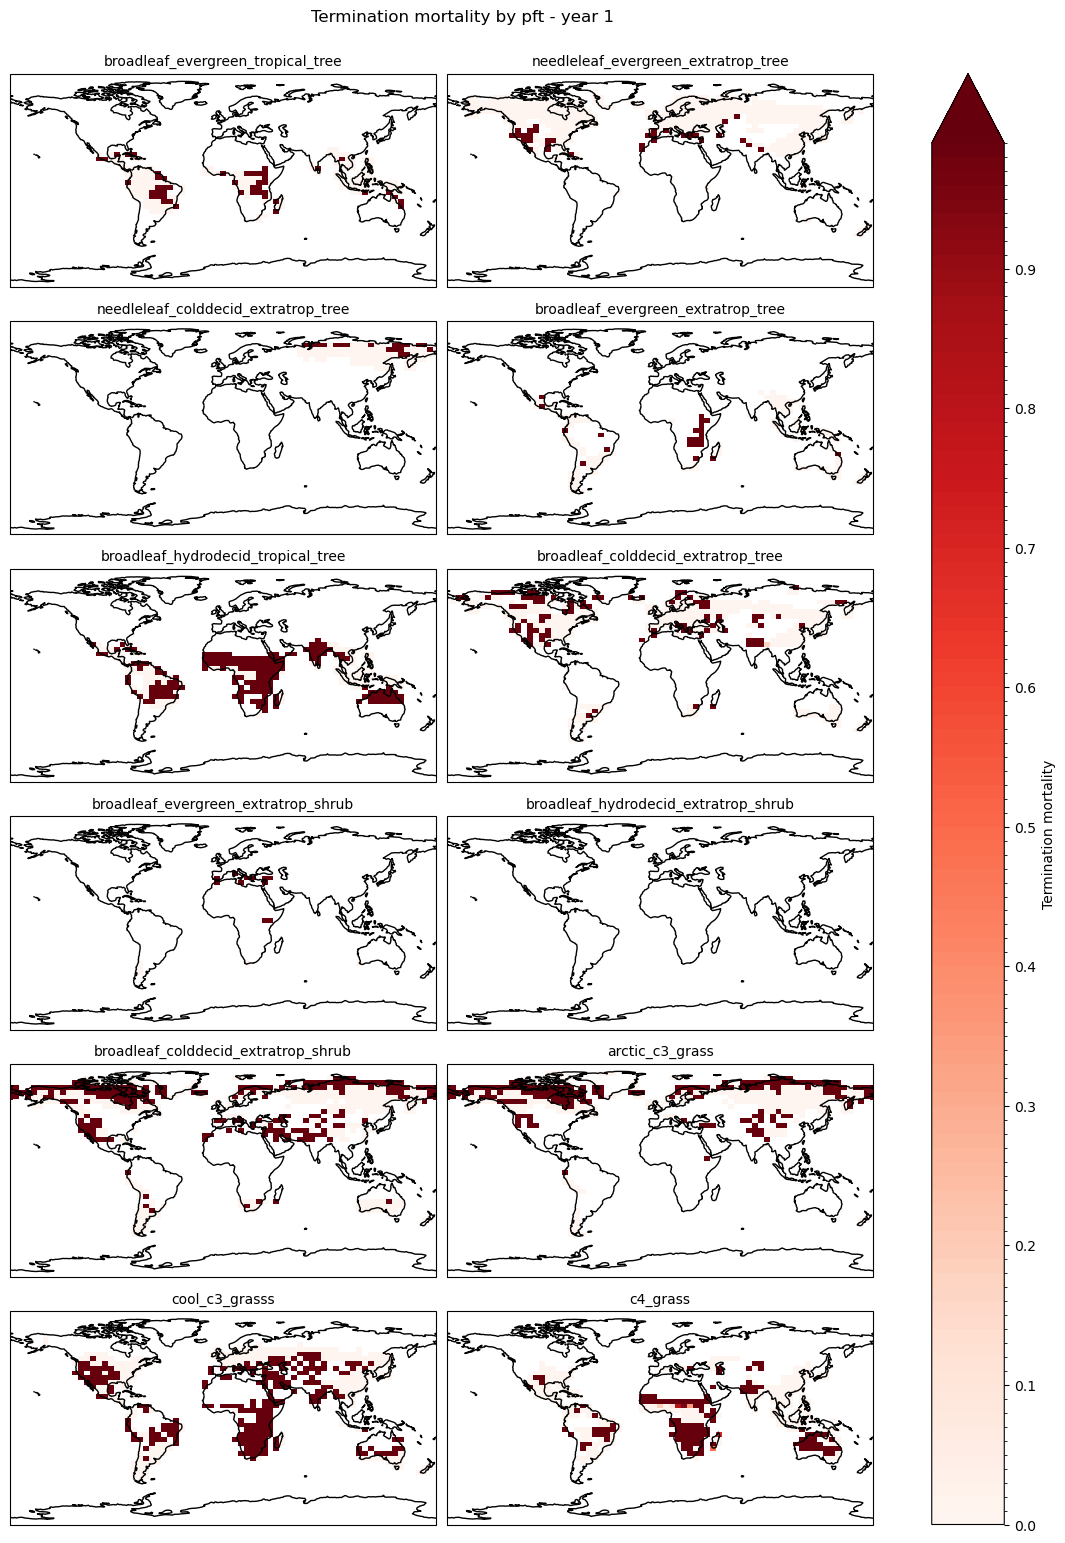

In [7]:
nplnt_sz_by_pft = fa.scpf_to_scls_by_pft(fates_atkin_v2.FATES_NPLANT_SZPF, fates_atkin_v2)
nplnt_by_pft = nplnt_sz_by_pft.sum(dim='fates_levscls')

tmort_sz_by_pft = fa.scpf_to_scls_by_pft(fates_atkin_v2.FATES_MORTALITY_TERMINATION_SZPF, fates_atkin_v2)
tmort_by_pft = tmort_sz_by_pft.sum(dim='fates_levscls') 

tmort = tmort_by_pft/nplnt_by_pft
tmort = tmort.isel(time=slice(0,12)).mean(dim='time')

g = tmort.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "Termination mortality"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,1.0,0.01), cmap='Reds',
            facecolor="white")

for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=10)

[ax.coastlines() for ax in g.axes.flatten()]

# Add a big title at the top
plt.suptitle('Termination mortality by pft - year 1', y=1.02, x = 0.45)
;

### Termination mortality year 74

In [8]:
# atkin bmort only - first ten years
fates_atkin_v2_74 = '/compyfs/need138/elm_runs/fixedbiogeog_nocomp_Atkin_bmort.Ec63cce2-F3bbfd35.2023-02-01/run/fixedbiogeog_nocomp_Atkin_bmort.Ec63cce2-F3bbfd35.2023-02-01.elm.h0.sofar2074.nc'
fates_atkin_v2_74 = xr.open_dataset(fates_atkin_v2_74, decode_times=False)


''

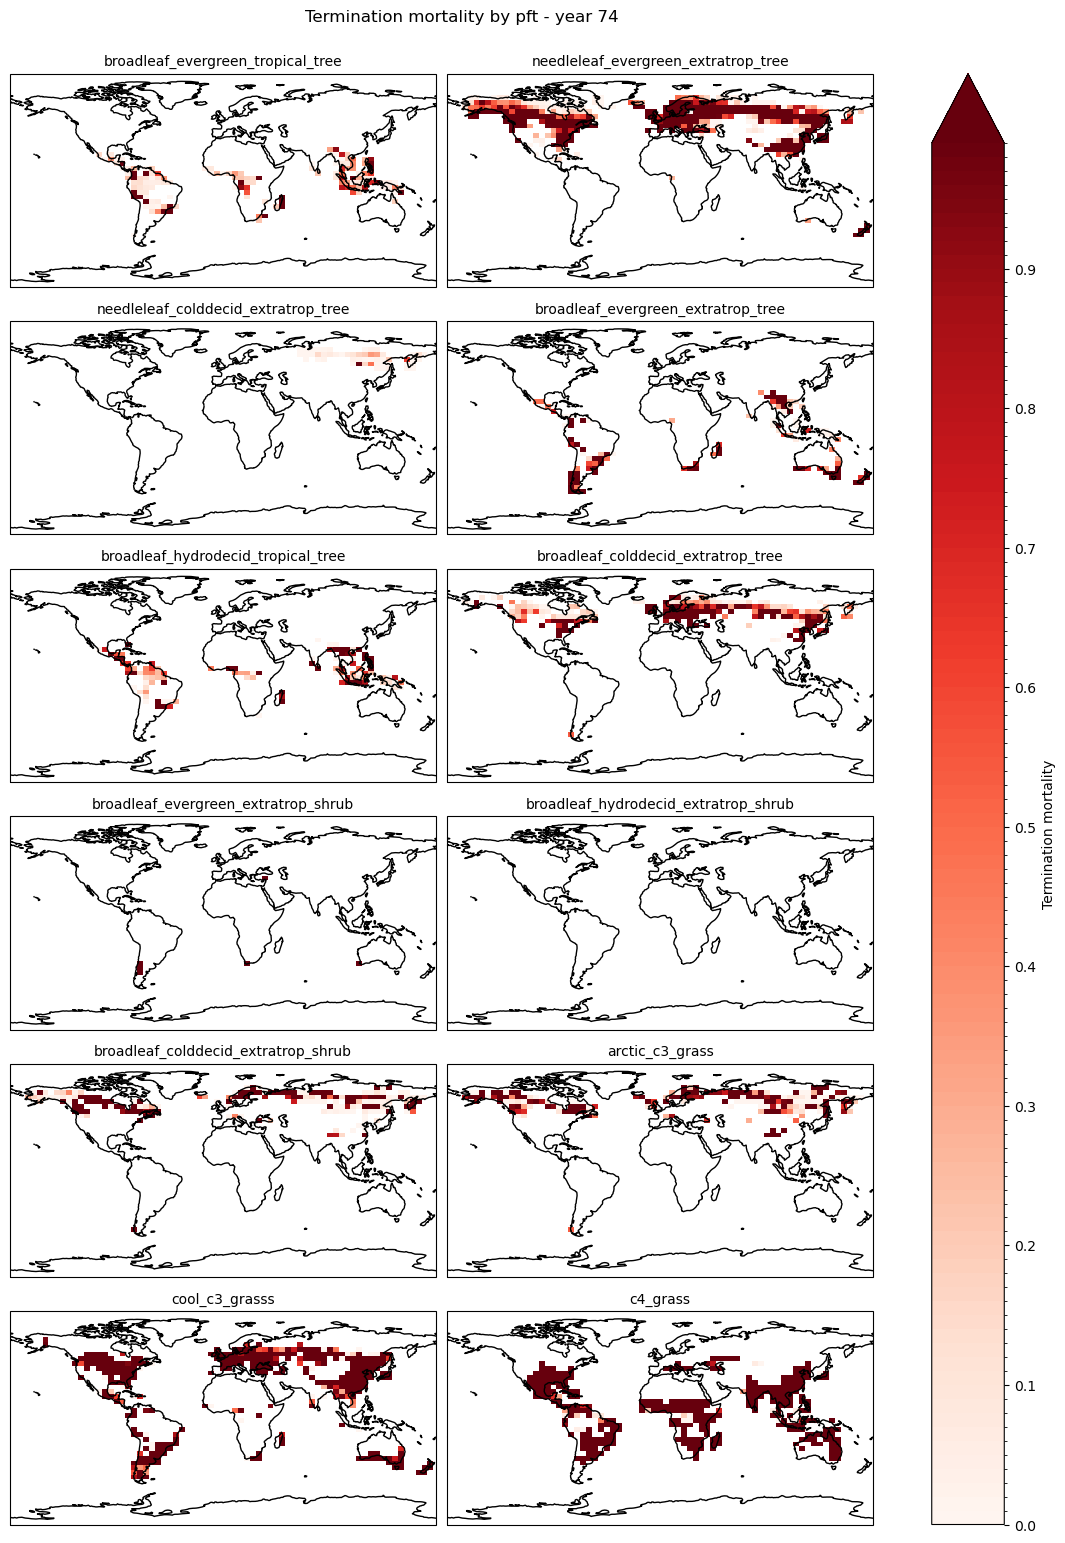

In [9]:
nplnt_sz_by_pft = fa.scpf_to_scls_by_pft(fates_atkin_v2_74.FATES_NPLANT_SZPF, fates_atkin_v2)
nplnt_by_pft = nplnt_sz_by_pft.sum(dim='fates_levscls')

tmort_sz_by_pft = fa.scpf_to_scls_by_pft(fates_atkin_v2_74.FATES_MORTALITY_TERMINATION_SZPF, fates_atkin_v2)
tmort_by_pft = tmort_sz_by_pft.sum(dim='fates_levscls') 

tmort = tmort_by_pft/nplnt_by_pft
tmort = tmort.mean(dim='time')

g = tmort.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "Termination mortality"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,1.0,0.01), cmap='Reds',
            facecolor="white")

for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=10)

[ax.coastlines() for ax in g.axes.flatten()]

# Add a big title at the top
plt.suptitle('Termination mortality by pft - year 74', y=1.02, x = 0.45)
;

### Termination mortality by PFT - Ryan

In [10]:
# load ryan 
fates_ryan ='/compyfs/need138/elm_runs/fixedbiog_nocomp_ryan.Ec63cce2-F0a617d8.2023-01-20/run/lnd/hist/fixedbiog_nocomp_ryan.Ec63cce2-F0a617d8.2023-01-20.elm.h0.sofar2000s.nc'
fates_ryan = xr.open_dataset(fates_ryan, decode_times=False)
 

''

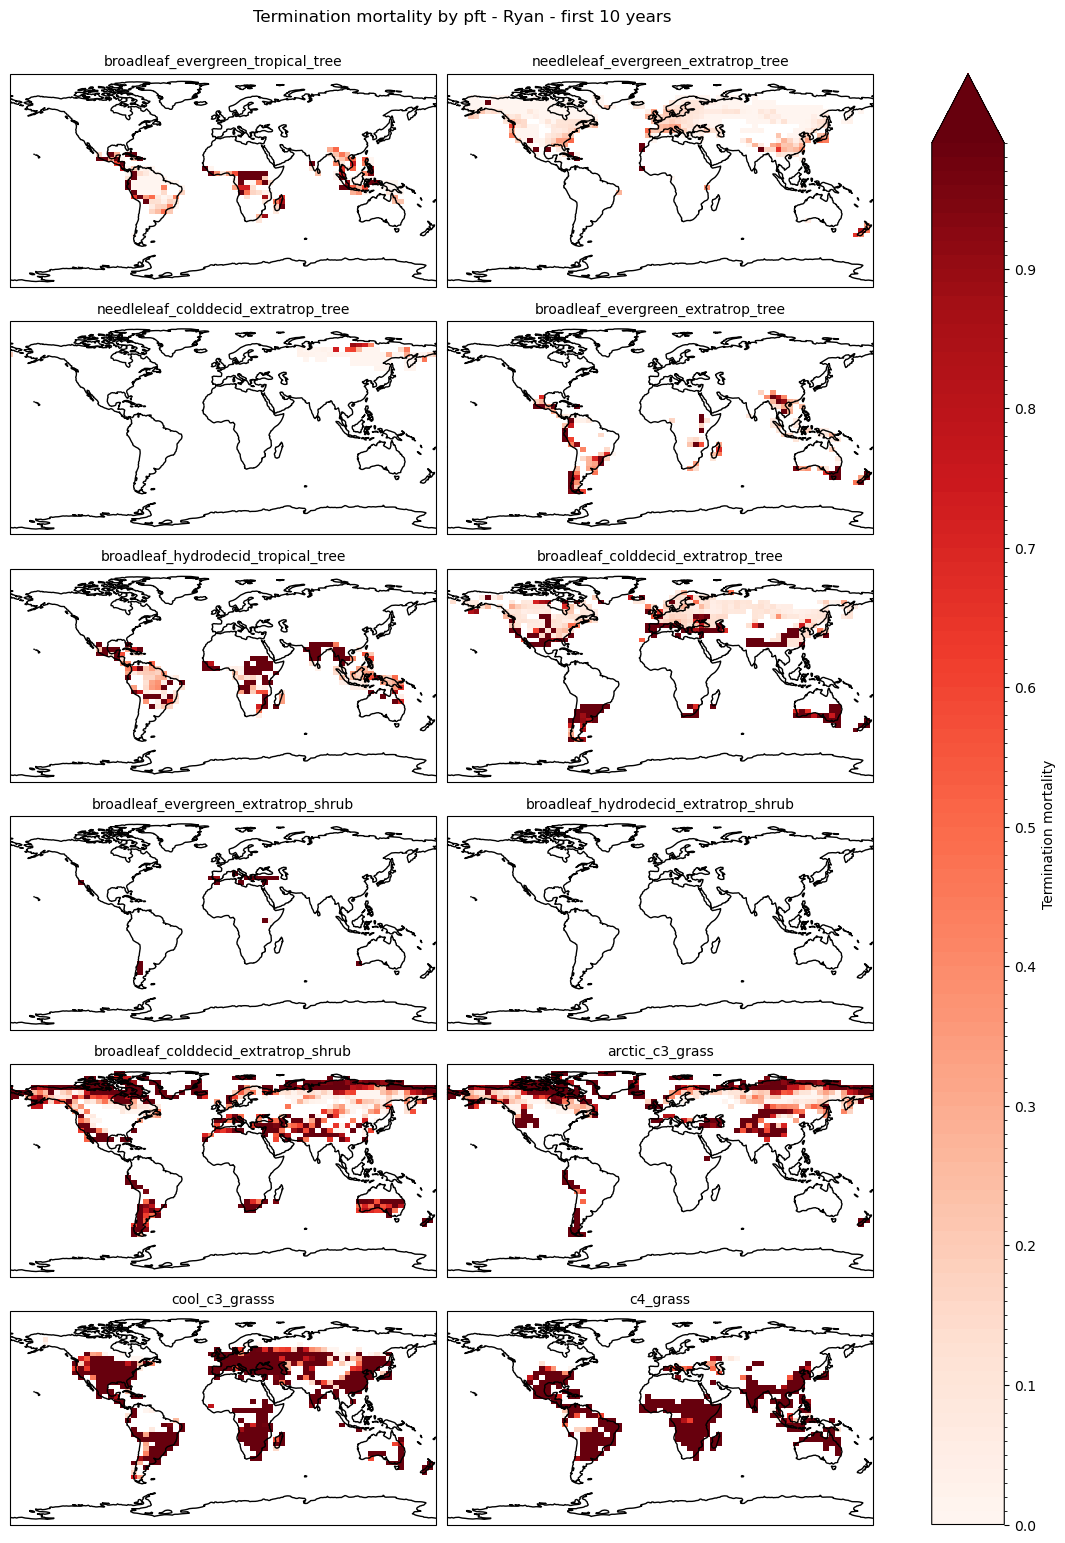

In [11]:
nplnt_sz_by_pft = fa.scpf_to_scls_by_pft(fates_ryan.FATES_NPLANT_SZPF, fates_ryan)
nplnt_by_pft = nplnt_sz_by_pft.sum(dim='fates_levscls')

tmort_sz_by_pft = fa.scpf_to_scls_by_pft(fates_ryan.FATES_MORTALITY_TERMINATION_SZPF, fates_ryan)
tmort_by_pft = tmort_sz_by_pft.sum(dim='fates_levscls') 

tmort = tmort_by_pft/nplnt_by_pft
tmort = tmort.mean(dim='time')

g = tmort.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "Termination mortality"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,1.0,0.01), cmap='Reds',
            facecolor="white")

for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=10)

[ax.coastlines() for ax in g.axes.flatten()]

# Add a big title at the top
plt.suptitle('Termination mortality by pft - Ryan - first 10 years', y=1.02, x = 0.45)
;